<a href="https://colab.research.google.com/github/wanderloop/WanderlustAI/blob/master/midpoint_to_coo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import DataFrame, read_csv, concat
!pip install pandas_profiling==2.8.0
from pandas_profiling import ProfileReport
from numpy import linspace, min, max, sqrt, ravel
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from gc import collect
from pickle import dump
from io import BytesIO
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving assumed_PHA.csv to assumed_PHA.csv


In [ ]:
df = read_csv(BytesIO(uploaded['assumed_PHA.csv']))
df.fillna(df.median(axis=0), # Fills median values in row
          inplace=True,)
df.head()

,X1,Y1,X2,Y2,MID_POINT_X,MID_POINT_Y,Area,long,lat
0,297,395,343,519,320.0,457.0,5704,24.920860,67.143323
1,839,315,870,404,854.5,359.5,2759,24.920899,67.143506
2,1223,284,1256,361,1239.5,322.5,2541,24.920841,67.143605
3,871,270,896,334,883.5,302.0,1600,24.920933,67.143584
4,421,294,450,367,435.5,330.5,2117,24.921013,67.143442


In [ ]:
print(df.columns)

Index(['X1', 'Y1', 'X2', 'Y2', 'MID_POINT_X', 'MID_POINT_Y', 'Area', 'long',
       'lat'],
      dtype='object')


In [ ]:
df.rename(columns={'MID_POINT_X': 'MPX',
                   'MID_POINT_Y': 'MPY',},
          inplace=True,)
df.head()

,X1,Y1,X2,Y2,MPX,MPY,Area,long,lat
0,297,395,343,519,320.0,457.0,5704,24.920860,67.143323
1,839,315,870,404,854.5,359.5,2759,24.920899,67.143506
2,1223,284,1256,361,1239.5,322.5,2541,24.920841,67.143605
3,871,270,896,334,883.5,302.0,1600,24.920933,67.143584
4,421,294,450,367,435.5,330.5,2117,24.921013,67.143442


In [ ]:
df.tail()

,X1,Y1,X2,Y2,MPX,MPY,Area,long,lat
13,1097,236,1117,274,1107.0,255.0,760,24.921000,67.143724
14,870,274,897,343,883.5,308.5,1863,24.920927,67.143555
15,215,409,264,535,239.5,472.0,6174,24.920873,67.143292
16,270,548,342,689,306.0,618.5,10152,24.920829,67.143271
17,358,536,429,682,393.5,609.0,10366,24.920827,67.143284


In [ ]:
df1, df2 = df.head(), df.tail()
conc_data_row = concat([df1,
                        df2,],
                        axis=0, # Adds dataframes in row
                        ignore_index=False,)
conc_data_row

,X1,Y1,X2,Y2,MPX,MPY,Area,long,lat
0,297,395,343,519,320.0,457.0,5704,24.920860,67.143323
1,839,315,870,404,854.5,359.5,2759,24.920899,67.143506
2,1223,284,1256,361,1239.5,322.5,2541,24.920841,67.143605
3,871,270,896,334,883.5,302.0,1600,24.920933,67.143584
4,421,294,450,367,435.5,330.5,2117,24.921013,67.143442
13,1097,236,1117,274,1107.0,255.0,760,24.921000,67.143724
14,870,274,897,343,883.5,308.5,1863,24.920927,67.143555
15,215,409,264,535,239.5,472.0,6174,24.920873,67.143292
16,270,548,342,689,306.0,618.5,10152,24.920829,67.143271
17,358,536,429,682,393.5,609.0,10366,24.920827,67.143284


In [ ]:
del conc_data_row
collect()

44

In [ ]:
del df1
collect()

0

In [ ]:
del df2
collect()

0

In [ ]:
assert df['X1'].notnull().all()
assert df['Y1'].notnull().all()
assert df['X2'].notnull().all()
assert df['Y2'].notnull().all()
assert df['MPX'].notnull().all()
assert df['MPX'].notnull().all()
assert df['Area'].notnull().all()
assert df['long'].notnull().all()
assert df['lat'].notnull().all()

In [ ]:
print('Duplicated entries:',
      df.duplicated().sum())
df[df.duplicated()].isna().median()

Duplicated entries: 0


X1     NaN
Y1     NaN
X2     NaN
Y2     NaN
MPX    NaN
MPY    NaN
Area   NaN
long   NaN
lat    NaN
dtype: float64

In [ ]:
df.drop_duplicates(subset=df.columns.values[:-1],
                   keep='first',
                   inplace=True,)
print(df.shape, "Duplicated rows have been removed.")

(18, 9) Duplicated rows have been removed.


In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      18 non-null     int64  
 1   Y1      18 non-null     int64  
 2   X2      18 non-null     int64  
 3   Y2      18 non-null     int64  
 4   MPX     18 non-null     float64
 5   MPY     18 non-null     float64
 6   Area    18 non-null     int64  
 7   long    18 non-null     float64
 8   lat     18 non-null     float64
dtypes: float64(4), int64(5)
memory usage: 1.4 KB


In [ ]:
profile = ProfileReport(df,
                        title='Midpoint-Coo Report',
                        explorative=True,
                        progress_bar=True,)
profile.to_notebook_iframe()

In [ ]:
del profile
collect()

261851

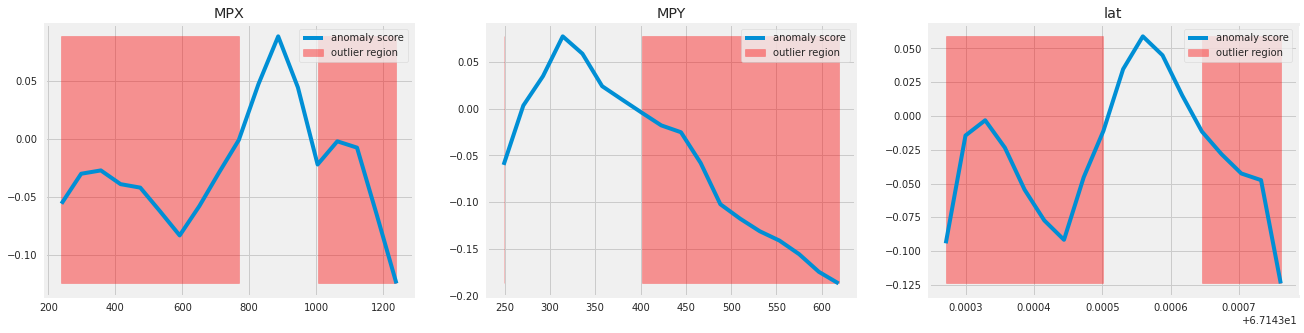

In [ ]:
cols = ['MPX',
        'MPY',
        'lat',]
fig, axs = plt.subplots(1,
                        3,
                        figsize=(20, 5),
                        facecolor='w',
                        edgecolor='k',)
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = linspace(df[column].min(),
                  df[column].max(),
                  len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx,
                anomaly_score,
                label='anomaly score',)
    axs[i].fill_between(xx.T[0],
                        min(anomaly_score),
                        max(anomaly_score), 
                        where=outlier==-1,
                        color='r', 
                        alpha=.4,
                        label='outlier region',)
    axs[i].legend()
    axs[i].set_title(column)

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)
df_pca.shape

(18, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.77872965, 0.19265439])

In [ ]:
del scaled_df
collect()

39

In [ ]:
del df_pca
collect()

0

In [ ]:
X = df[['MPX',
        'MPY',]]
y = df['lat']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,)

In [ ]:
X_train.head()

,MPX,MPY
14,883.5,308.5
4,435.5,330.5
2,1239.5,322.5
16,306.0,618.5
17,393.5,609.0


In [ ]:
regr = LinearRegression()
regr.fit(X_train,
         y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
del X_train
collect()

33

In [ ]:
del y_train
collect()

0

In [ ]:
y_pred = regr.predict(X_test)
print(X_test)
print(y_pred)

       MPX    MPY
1    854.5  359.5
6   1165.0  257.5
8    783.5  267.5
10   241.0  360.5
[67.14352511 67.14366719 67.14358931 67.1434125 ]


In [ ]:
print('Coefficients:', 
      regr.coef_,)

print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test,
                            y_pred.ravel(),))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test,
                           y_pred.ravel(),))

print('Root mean square error: %.2f'
      % sqrt(mean_squared_error(y_test,
                                y_pred.ravel(),)))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, 
                 y_pred.ravel(),))

Coefficients: [ 1.82177843e-07 -8.38411046e-07]
Mean absolute error: 0.00
Mean squared error: 0.00
Root mean square error: 0.00
Coefficient of determination: 0.84


In [ ]:
explained_variance_score(y_test,
                         y_pred.ravel(),)

0.8439450168139819

In [ ]:
del X_test
collect()

11

In [ ]:
del y_pred
collect()

0

In [ ]:
del y_test
collect()

0

In [ ]:
regr.predict([[1107,
               255,]])

array([67.14365872])

In [ ]:
pickle_out=open("dict1.pickle",
                "wb",)
dump(regr,
     pickle_out,)

In [ ]:
pickle_out.close()

In [ ]:
del pickle_out
collect()

0

In [ ]:
!ls

assumed_PHA.csv  dict1.pickle  sample_data


In [ ]:
!pip freeze | grep scikit-learn

scikit-learn==0.22.2.post1
